In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns
from cplAE_MET.utils.analysis_helpers import load_exp_output
from cplAE_MET.utils.utils import get_all_1d_mask

sns.set()

Note: to be able to use all crisp methods, you need to install some additional packages:  {'graph_tool'}


In [2]:
sns.set_style("whitegrid")

def scatter3(X,col,xlims=(-3,3),ylims=(-3,3),zlims=(-3,3), ps=None, fig=None):
    
    if fig is None:
        fig = plt.figure(figsize=(5,5))
        
    if ps is None:
        ps = np.array([1 for i in range(X.shape[0])])

    plt.ion()    
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter(X[:,0], X[:,1], X[:,4],s=ps,c=col)


    ax.set_xticks([])
    ax.set_zticks([])
    ax.set_yticks([])
    
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_zlabel('')
    
    ax.set_xlim(xlims[0],xlims[1])
    ax.set_ylim(ylims[0],ylims[1])
    ax.set_zlim(zlims[0],zlims[1])

    plt.axis('on')
    ax.set_frame_on(False)
    plt.tight_layout()
    return ax, sc

In [3]:

output = load_exp_output(exp_name="TEM_13k_5d_M120x4_2conv_10_10", pkl_file="Results_trial_650.pkl")

output['platform'] = np.array(["EM" if i==1 else "patchseq" for i in output['platform']])

In [4]:
masks = get_all_1d_mask(output)

MovieWriter imagemagick unavailable; using Pillow instead.


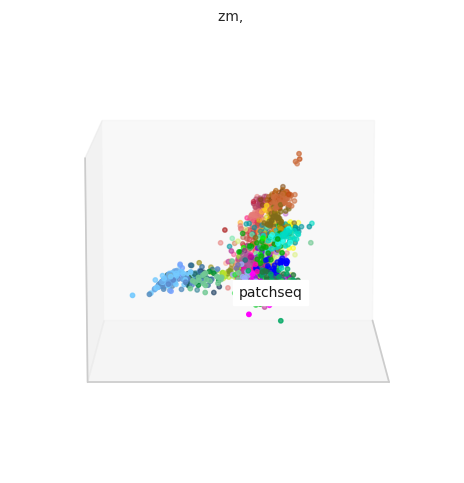

In [5]:
fig = plt.figure(figsize=(5,5))


def get_col(i, emb_platforms):
    # cell_class = ["patchseq", 'fMOST', "EM", "ME"]
    cell_class = ["patchseq", "EM"]
    # cell_class_ind = np.digitize(i%360, [90, 180, 270, 360], right=True)
    cell_class_ind = np.digitize(i%360, [180, 360], right=True)
    return cell_class[cell_class_ind]


def update_m_platform(i, emb, emb_color, patch_tm_mask, emb_platforms, title, xlims=(-5,5), ylims=(-5,5), zlims=(-5,5)):
    fig.clear(True) 

    cell_label = get_col(i, emb_platforms)
    if cell_label == "EM":
        mask1 = np.array([True if plat=="EM" else False for plat in emb_platforms])
        mask = np.logical_or(mask1, patch_tm_mask)
    else:
        mask = patch_tm_mask
    txt_xyz = [4,0,0]
    point_size = np.array([10 for i in range(emb.shape[0])])
    if cell_label != "patchseq":
        point_size[mask1] = 1

    ax,_ = scatter3(emb[mask],
                    emb_color[mask],
                    xlims=xlims,
                    ylims=ylims,
                    zlims=zlims,
                    fig=fig,
                    ps=point_size[mask])
    
    ax.text(txt_xyz[0],
            txt_xyz[1],
            txt_xyz[2]-1.5,
            cell_label, 
            size=10,
            color='k', 
            backgroundcolor='w')
    
    ax.set_title(title, size=10)
    ax.view_init(elev=10., azim=i)
    plt.tight_layout()
    fig.canvas.draw()
    fig.canvas.flush_events()
    return


def update_view(i, emb, emb_color, mask, title, xlims=(-5,5), ylims=(-5,5), zlims=(-5,5)):
    fig.clear(True) 
    point_size = np.array([1 for i in range(emb.shape[0])])

    ax,_ = scatter3(emb[mask],
                    emb_color[mask],
                    xlims=xlims,
                    ylims=ylims,
                    zlims=zlims,
                    fig=fig,
                    ps=point_size[mask])
    
    ax.set_title(title, size=10)

    ax.view_init(elev=10., azim=i)
    plt.tight_layout()
    fig.canvas.draw()
    fig.canvas.flush_events()
    return

anim = FuncAnimation(fig,
                     update_m_platform, 
                     fargs=(output['zm'], 
                            output['cluster_color'],
                            masks['is_tm_1d'], 
                            output['platform'],
                            "zm, "), 
                    frames=np.arange(0, 360, 2), 
                    interval=50)

# anim = FuncAnimation(fig,
#                      update_view, 
#                      fargs=(cpl_10k_output['zt'], 
#                             cpl_10k_output['cluster_color'],
#                             masks['is_t_1d'],
#                             "zt, 6590 Patchseq t_cells"), 
#                     frames=np.arange(0, 360, 2), 
#                     interval=50)


anim.save("TEM_13k_5d_M120x4_2conv_10_10_trail_650_v2.gif", dpi=200, writer='imagemagick')

# To display animation, you need to copy the 

![test](./TEM_13k_5d_M120x4_2conv_10_10_trail_650_v2.gif)


